# Import Libraries

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import scipy
import pycountry_convert as pc
import folium
import json
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl
import quandl
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
%matplotlib inline

In [4]:
# Creating path
path = r'/Users/cameronpaschall/Desktop/Project 6 - Covid'

# Importing Data

In [6]:
# Configure API key 
quandl.ApiConfig.api_key = 'VgVsxwwxH7Z2sHkMe4Cx'

In [7]:
# Importing Bitcoin market price over time
data = quandl.get('BCHAIN/MKPRU')

# Data wrangling and cleaning

In [18]:
data.head()

,Value
Date,
2009-01-02,0.0
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0
2009-01-06,0.0


In [9]:
data.tail()

,Value
Date,
2022-01-28,37146.85
2022-01-29,37770.15
2022-01-30,38186.49
2022-01-31,37918.62
2022-02-01,38521.79


In [10]:
data.shape

(4779, 1)

In [11]:
data.columns

Index(['Value'], dtype='object')

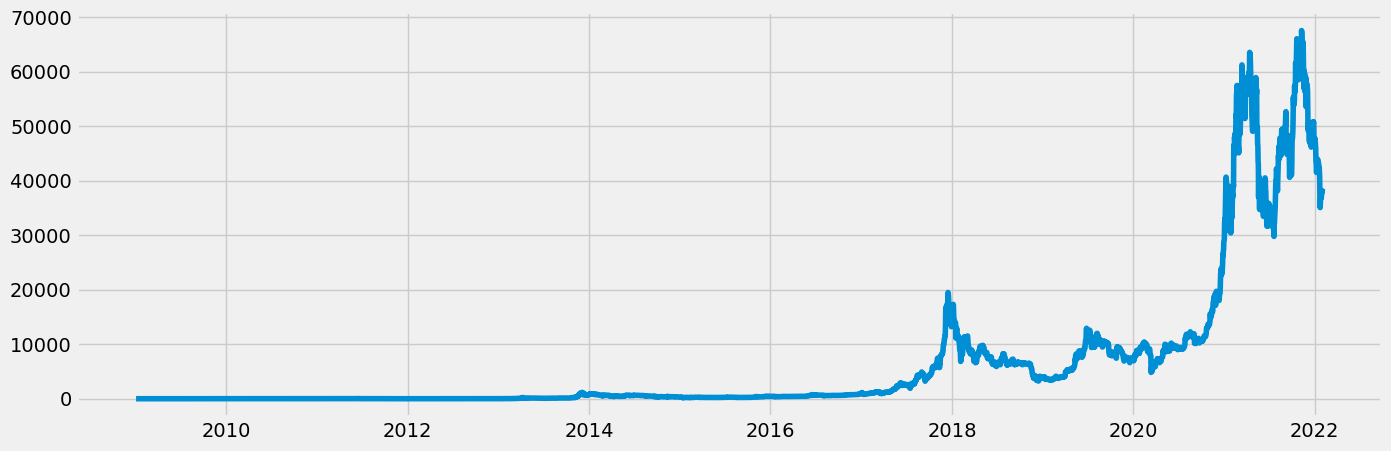

In [12]:
# Plot the data using matplotlib
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

In [13]:
# Check for missing values 
data.isnull().sum()

Value    0
dtype: int64

In [14]:
# Check for duplicates
dups = data.duplicated()
dups.sum()

810

# Time series analysis

In [16]:
data_2 = data.reset_index()

## Create datetime column for 2017-2022

## I decided to create a subset of the data for 2017-2022 because those are the years that bitcoin had the most dramatic changes

In [17]:
data_sub = data_2.loc[(data_2['Date'] >= '2017-01-01') & (data_2['Date'] < '2022-02-01')]

In [20]:
from datetime import datetime


data_sub['datetime'] = pd.to_datetime(data_sub['Date']) ## create datetime column
data_sub = data_sub.set_index('datetime') # set datetime as index
data_sub.drop(['Date'], axis=1, inplace=True) # drop date column

data_sub.head()

,Value
datetime,
2017-01-01,997.72
2017-01-02,1015.97
2017-01-03,1013.42
2017-01-04,1126.76
2017-01-05,994.67


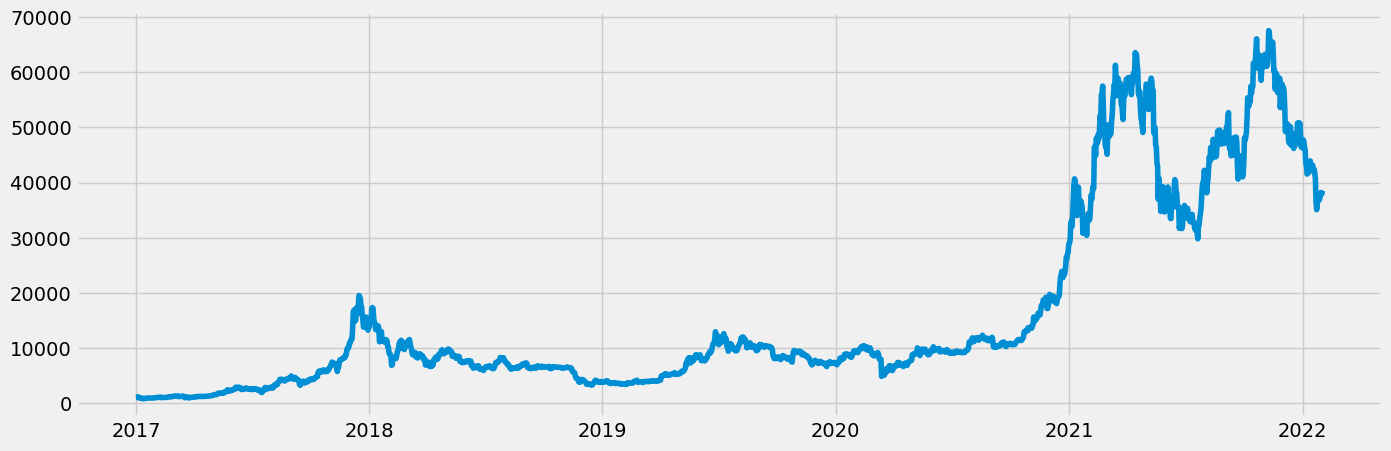

In [21]:
# Plot the  new date data using matplotlib
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data_sub)

# Decomposition

In [22]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [23]:
# Define a fixed size for all special charts
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

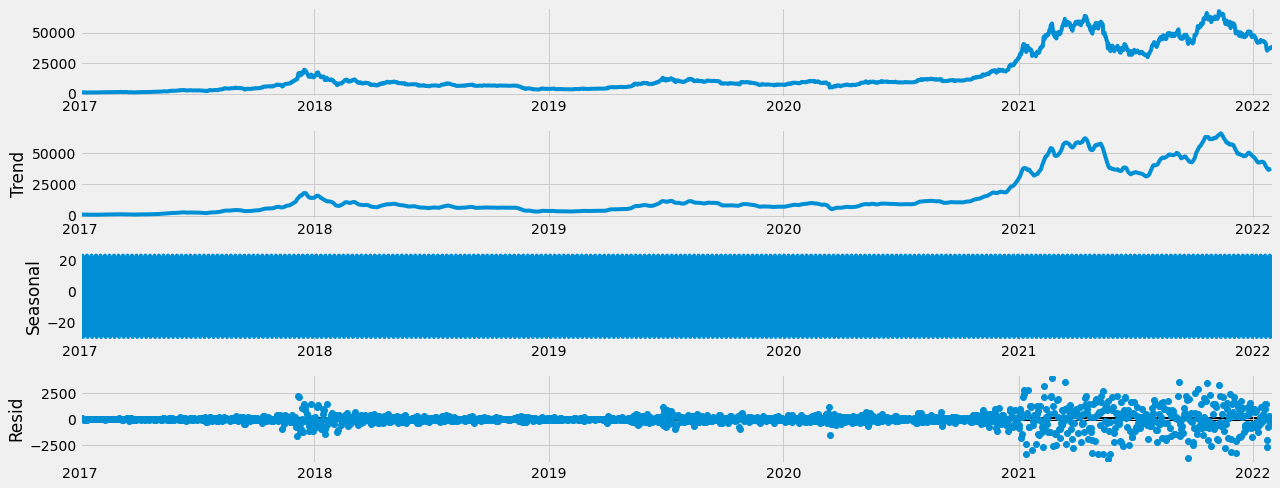

In [24]:
# Plot separate components
decomposition.plot()
plt.show()

## Decomposition Analysis- 

This data on bitcoin doesn't have that much noise so the level and trend are very similar.
I would say there is a dominate trend upwards except for a few large dips around the middle of 2021 and the middle of 2022. The residual is pretty much in line with the trend minus what looks like a few more ups and downs during the year of 2021.

# Test for stationarity 2009-2022

In [25]:
# Import adfuller() function, perform Dickey-Fuller Test, and apply test using function on time series

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   -0.978707
p-value                           0.760951
Number of Lags Used              32.000000
Number of Observations Used    4746.000000
Critical Value (1%)              -3.431729
Critical Value (5%)              -2.862149
Critical Value (10%)             -2.567094
dtype: float64


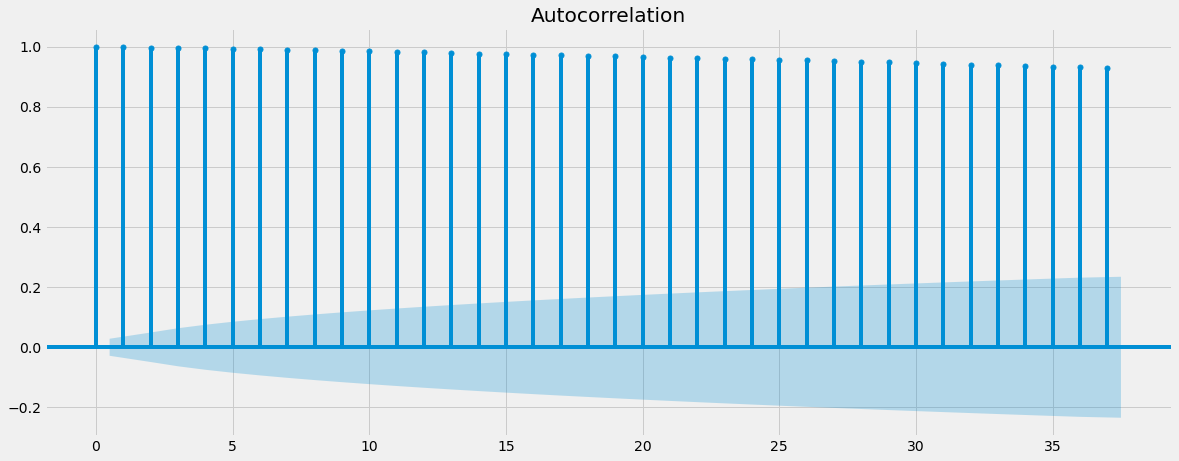

In [26]:
# Plot autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data)
plt.show()

# Stationarize data 2009-2022

In [27]:
# Calculate difference between every values and its lag, then store results in new dataframe
data_diff = data - data.shift(1) 

In [28]:
# Remove any missing values
data_diff.dropna(inplace = True)

In [30]:
data_diff.head()

,Value
Date,
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0
2009-01-06,0.0
2009-01-07,0.0


In [31]:
# Display column information
data_diff.columns

Index(['Value'], dtype='object')

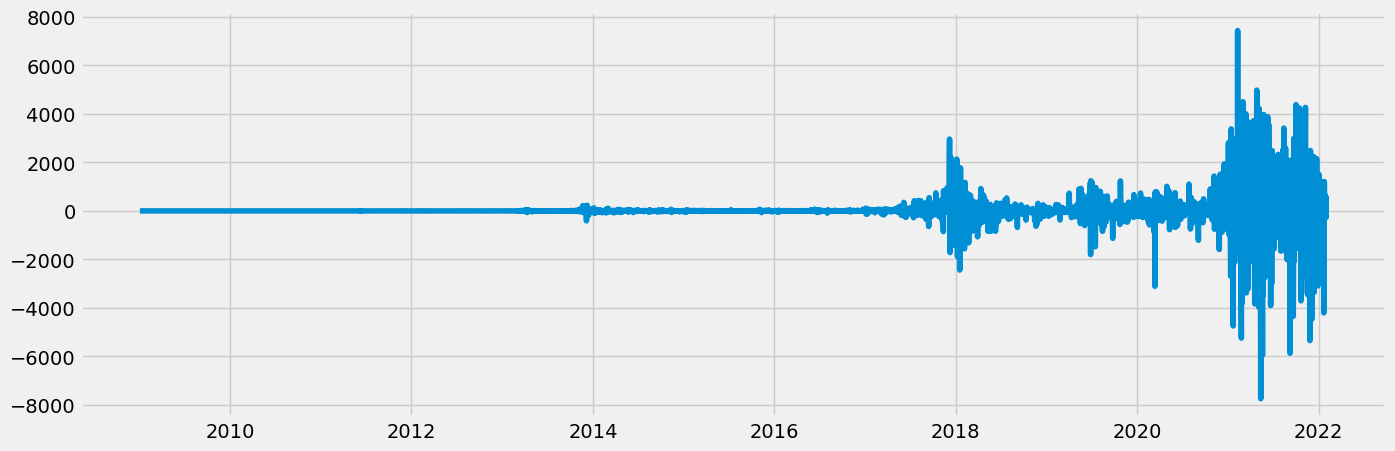

In [32]:
# Display time series with differencing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [33]:
# Perform Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.973965e+00
p-value                        2.202571e-17
Number of Lags Used            3.200000e+01
Number of Observations Used    4.745000e+03
Critical Value (1%)           -3.431729e+00
Critical Value (5%)           -2.862149e+00
Critical Value (10%)          -2.567094e+00
dtype: float64


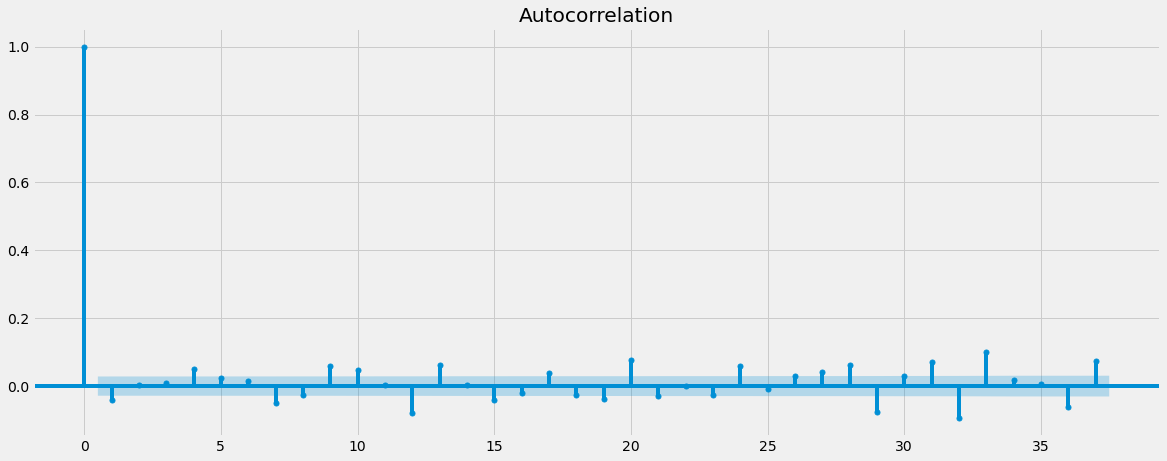

In [34]:
# Display autocorrelation
plot_acf(data_diff)
plt.show()

# # Test for stationarity 2017-2022

In [35]:
# Import adfuller() function, perform Dickey-Fuller Test, and apply test using function on time series

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.063898
p-value                           0.729252
Number of Lags Used              24.000000
Number of Observations Used    1833.000000
Critical Value (1%)              -3.433923
Critical Value (5%)              -2.863118
Critical Value (10%)             -2.567610
dtype: float64


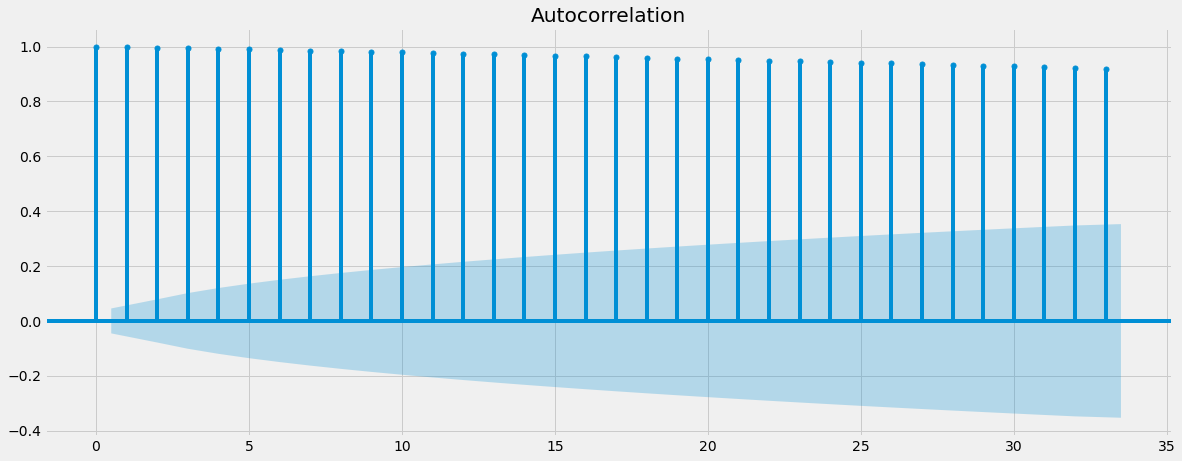

In [36]:
# Plot autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

## Dickey Fuller test analysis- 

The p-value is much greater than 0.05 so the test is not very significant.
The critical values are all much smaller than the test stat so the null hypothesis cannot be rejected.
This would mean that the data is non-stationary.